#Lung Capacity Prediction using Linear Regression

#Importing libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Uploading the file

In [22]:
from google.colab import files
uploaded=files.upload()

Saving LungCapData.csv to LungCapData (1).csv


#Loading the dataset

In [23]:
data = pd.read_csv('LungCapData.csv')

#Summarizing the dataset

In [24]:
print(data.shape)
print(data.head(5))

(725, 7)
   patient id  LungCap  Age  Height Smoke  Gender Caesarean
0           1    6.475    6    62.1    no    male        no
1           2   10.125   18    74.7   yes  female        no
2           3    9.550   16    69.7    no  female       yes
3           4   11.125   14    71.0    no    male        no
4           5    4.800    5    56.9    no    male        no


#Dropping Unnecessary Columns

In [25]:
data = data.drop('patient id', axis=1)
data.head(5)

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


#Checking Missing Values

In [26]:
data.isna().any()

,0
LungCap,False
Age,False
Height,False
Smoke,False
Gender,False
Caesarean,False


#Encoding Cateogorical Variables

In [27]:
from sklearn.preprocessing import LabelEncoder
for col in ['Smoke', 'Gender', 'Caesarean']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

#Splitting into Features and Target

In [28]:
X = data.drop('LungCap', axis=1)
y = data['LungCap']

#Splitting into Training and Testing Dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training using Linear Regression Algorithm

**Linear regression** is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It aims to find the "best-fit" straight line (or hyperplane in higher dimensions) that minimizes the difference between the predicted values and the actual observed values.

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

#Predicting for new data

In [32]:
new_data = pd.DataFrame({
    'Age': [6],
    'Height': [62.1],
    'Smoke': [0],
    'Gender': [1],
    'Caesarean': [0]
})

new_data_scaled = scaler.transform(new_data)
predicted_lungcap = model.predict(new_data_scaled)
print(f"Predicted Lung Capacity for new ID: {predicted_lungcap[0]:.2f}")

Predicted Lung Capacity for new ID: 6.42


#Evaluating model with metrics

In [33]:
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Model R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Model R² Score: 0.84
Mean Absolute Error (MAE): 0.85
Mean Squared Error (MSE): 1.13
Root Mean Squared Error (RMSE): 1.07


#Predicting actual vs predicted Lung Capacity

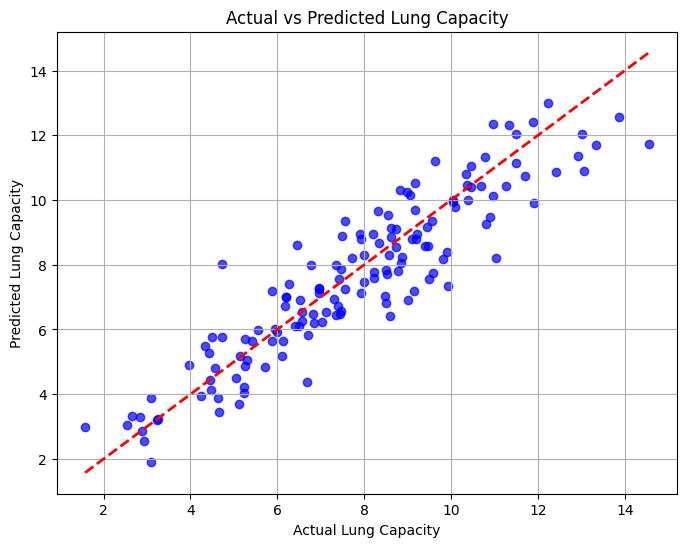

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Lung Capacity")
plt.ylabel("Predicted Lung Capacity")
plt.title("Actual vs Predicted Lung Capacity")
plt.grid(True)
plt.show()